In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt 

In [3]:
vd=pdr.get_data_yahoo("V")
day=np.arange(1,len(vd)+1)
vd['Day']=day
vd.head()

,High,Low,Open,Close,Volume,Adj Close,Day
Date,,,,,,,
2017-11-03,111.419998,110.510002,110.940002,111.360001,3757600.0,107.812866,1
2017-11-06,112.150002,111.199997,111.360001,111.919998,4094700.0,108.355034,2
2017-11-07,112.470001,111.559998,112.250000,112.089996,3697900.0,108.519623,3
2017-11-08,112.910004,111.820000,112.010002,112.470001,4417800.0,108.887527,4
2017-11-09,112.220001,110.930000,111.800003,112.139999,4334700.0,108.568016,5


In [4]:
vd.drop(columns=["Volume","Adj Close"],inplace=True)

In [5]:
vd=vd[["Day","High","Low","Open","Close"]]

In [6]:
vd.head()

,Day,High,Low,Open,Close
Date,,,,,
2017-11-03,1,111.419998,110.510002,110.940002,111.360001
2017-11-06,2,112.150002,111.199997,111.360001,111.919998
2017-11-07,3,112.470001,111.559998,112.250000,112.089996
2017-11-08,4,112.910004,111.820000,112.010002,112.470001
2017-11-09,5,112.220001,110.930000,111.800003,112.139999


In [7]:
vd.corr()

,Day,High,Low,Open,Close
Day,1.000000,0.881207,0.870620,0.875283,0.875969
High,0.881207,1.000000,0.998219,0.998873,0.998724
Low,0.870620,0.998219,1.000000,0.998689,0.998829
Open,0.875283,0.998873,0.998689,1.000000,0.997563
Close,0.875969,0.998724,0.998829,0.997563,1.000000


In [8]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-11-03 to 2022-11-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int32  
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Open    1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 54.1 KB


In [20]:
vd['100-day']=vd['Close'].rolling(100).mean().shift()
vd['200-day']=vd['Close'].rolling(200).mean().shift()
vd[200:205]

,Day,High,Low,Open,Close,100-day,200-day,signal,return,system return,entry,50-day
Date,,,,,,,,,,,,
2019-10-31,501,179.699997,178.009995,179.250000,178.860001,176.6214,165.06315,1,-0.002178,-0.002178,0.0,176.8148
2019-11-01,502,181.320007,179.559998,180.130005,180.929993,176.7069,165.27075,1,0.011507,0.011507,0.0,176.7732
2019-11-04,503,182.399994,178.809998,182.080002,178.949997,176.8003,165.48900,-1,-0.011004,0.011004,-2.0,176.7900
2019-11-05,504,179.559998,175.179993,179.070007,176.369995,176.8963,165.69125,-1,-0.014522,0.014522,0.0,176.8644
2019-11-06,505,178.190002,176.139999,176.369995,176.770004,176.9634,165.88285,-1,0.002265,-0.002265,0.0,176.8400


In [21]:
vd['signal']=np.where(vd["100-day"]>vd["200-day"],1,0)
vd['signal']=np.where(vd["100-day"]<vd["200-day"],-1,vd['signal'])
vd.dropna(inplace=True)
vd.head()

,Day,High,Low,Open,Close,100-day,200-day,signal,return,system return,entry,50-day
Date,,,,,,,,,,,,
2019-10-31,501,179.699997,178.009995,179.250000,178.860001,176.6214,165.06315,1,-0.002178,-0.002178,0.0,176.8148
2019-11-01,502,181.320007,179.559998,180.130005,180.929993,176.7069,165.27075,1,0.011507,0.011507,0.0,176.7732
2019-11-04,503,182.399994,178.809998,182.080002,178.949997,176.8003,165.48900,1,-0.011004,0.011004,-2.0,176.7900
2019-11-05,504,179.559998,175.179993,179.070007,176.369995,176.8963,165.69125,1,-0.014522,0.014522,0.0,176.8644
2019-11-06,505,178.190002,176.139999,176.369995,176.770004,176.9634,165.88285,1,0.002265,-0.002265,0.0,176.8400


In [22]:
vd['return']=np.log(vd['Close']).diff()
vd['system return']=vd['signal']*vd['return']
vd['entry']=vd['signal'].diff()
vd.head()

,Day,High,Low,Open,Close,100-day,200-day,signal,return,system return,entry,50-day
Date,,,,,,,,,,,,
2019-10-31,501,179.699997,178.009995,179.250000,178.860001,176.6214,165.06315,1,NaN,NaN,NaN,176.8148
2019-11-01,502,181.320007,179.559998,180.130005,180.929993,176.7069,165.27075,1,0.011507,0.011507,0.0,176.7732
2019-11-04,503,182.399994,178.809998,182.080002,178.949997,176.8003,165.48900,1,-0.011004,-0.011004,0.0,176.7900
2019-11-05,504,179.559998,175.179993,179.070007,176.369995,176.8963,165.69125,1,-0.014522,-0.014522,0.0,176.8644
2019-11-06,505,178.190002,176.139999,176.369995,176.770004,176.9634,165.88285,1,0.002265,0.002265,0.0,176.8400


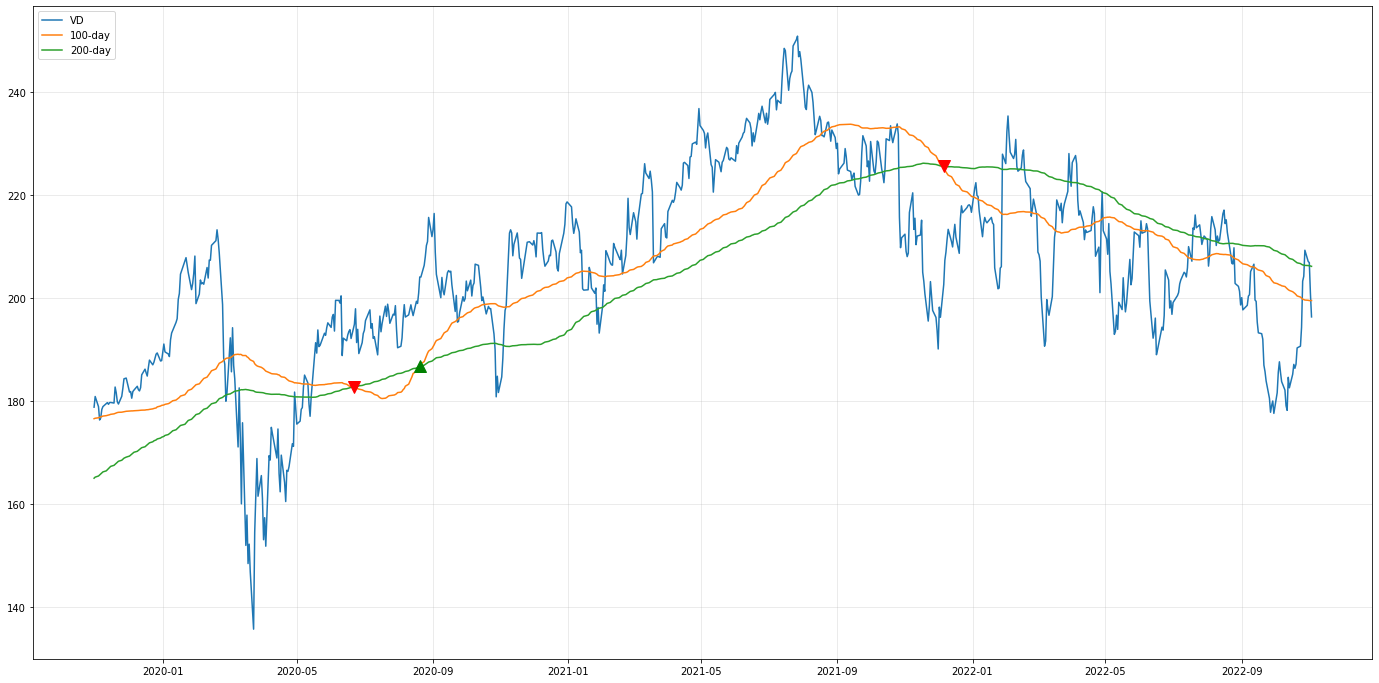

In [25]:
plt.rcParams['figure.figsize'] = 24, 12
plt.grid(True, alpha = .3)
plt.plot(vd.iloc[-1500:]['Close'], label = 'VD')
plt.plot(vd.iloc[-1500:]['100-day'], label = '100-day')
plt.plot(vd.iloc[-1500:]['200-day'], label = '200-day')
plt.plot(vd[-1500:].loc[vd.entry == 2].index, vd[-1500:]['100-day'][vd.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(vd[-1500:].loc[vd.entry == -2].index, vd[-1500:]['200-day'][vd.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);